In [1]:
# Implementation of Convolutional neural network
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [10]:

image=tf.image.resize(image,size=([300,300]))

In [11]:
image


<tf.Tensor: shape=(300, 300, 1), dtype=float32, numpy=
array([[[27.        ],
        [27.        ],
        [27.        ],
        ...,
        [27.        ],
        [27.        ],
        [27.        ]],

       [[27.        ],
        [27.        ],
        [27.        ],
        ...,
        [27.        ],
        [27.        ],
        [27.        ]],

       [[27.        ],
        [27.        ],
        [27.        ],
        ...,
        [27.        ],
        [27.        ],
        [27.        ]],

       ...,

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [27.        ],
        [27.        ],
        [27.        ]],

       [[ 0.57485676],
        [ 0.        ],
        [ 0.2053062 ],
        ...,
        [27.        ],
        [27.        ],
        [27.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [27.        ],
        [27.        ],
        [27.        ]]], dtype=float32)

In [13]:
image=tf.squeeze(image).numpy()


In [14]:
image

array([[27.        , 27.        , 27.        , ..., 27.        ,
        27.        , 27.        ],
       [27.        , 27.        , 27.        , ..., 27.        ,
        27.        , 27.        ],
       [27.        , 27.        , 27.        , ..., 27.        ,
        27.        , 27.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 27.        ,
        27.        , 27.        ],
       [ 0.57485676,  0.        ,  0.2053062 , ..., 27.        ,
        27.        , 27.        ],
       [ 0.        ,  0.        ,  0.        , ..., 27.        ,
        27.        , 27.        ]], dtype=float32)

In [15]:
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

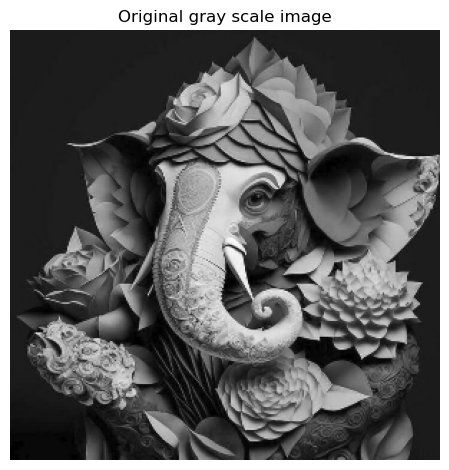

In [18]:
plt.imshow(image,cmap="gray")
plt.title("Original gray scale image")
plt.axis("off")
plt.show()

In [22]:
print(image.shape)

(300, 300)


In [23]:
image=tf.image.convert_image_dtype(image,dtype=tf.float32)

In [25]:
image=tf.expand_dims(image,axis=0)

In [26]:
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)


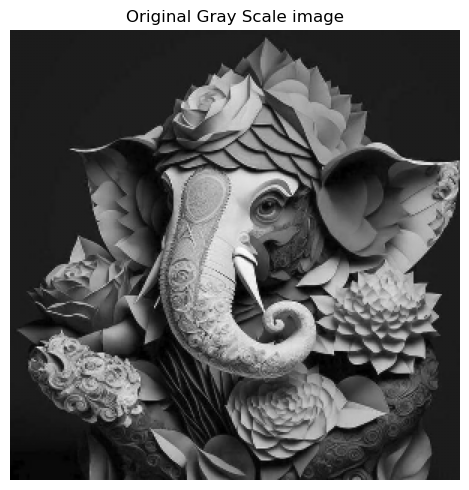

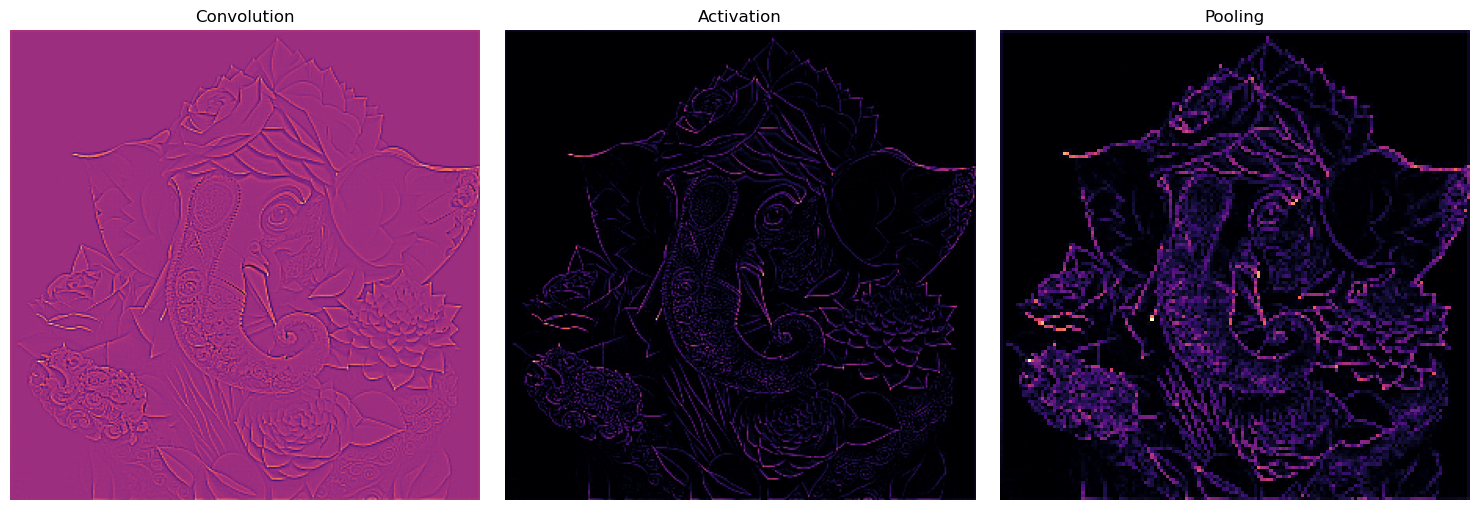

In [27]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# set the param 
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

# load the image
image = tf.io.read_file('C:/Users/Rakesh/Desktop/career/AI ML AND DL Practice/CV/Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))

# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect, 
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

# LeNet-5 Model

In [31]:
## Load the dataset


In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [33]:
mnist=tf.keras.datasets.mnist

In [34]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [38]:
rows,cols=28,28
X_train=X_train.reshape(X_train.shape[0],rows,cols,1)
X_test=X_test.reshape(X_test.shape[0],rows,cols,1)

In [39]:
input_shape=(rows,cols,1)

In [40]:
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")
X_test=X_test/255.0
X_train=X_train/255.0

In [43]:
y_train=tf.keras.utils.to_categorical(y_train,10)

In [64]:
def build_lenet(input_shape):
    # using the sequential model
    model=tf.keras.models.Sequential()
    # C1 using the convolutional layer

    model.add(tf.keras.layers.Conv2D(filters=6,strides=(1,1),kernel_size=(5,5),activation="tanh",input_shape=input_shape))
    # S2 using the subsampling layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
    # C3 using the convolutional layer
    model.add(tf.keras.layers.Conv2D(filters=6,strides=(1,1),kernel_size=(5,5),activation="tanh"))
    # S4 using the subsampling layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    #  D5 Creating dense layer
    model.add(tf.keras.layers.Dense(units=120,activation="tanh"))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=84,activation="tanh"))
    model.add(tf.keras.layers.Dense(units=10,activation="tanh"))


    return model
    

In [66]:
lenet=build_lenet(input_shape)
lenet.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [67]:
epochs=10
lenet.fit(X_train,y_train,epochs=epochs,batch_size=128,verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1024 - loss: 7.1888 
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0993 - loss: 8.0051
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0993 - loss: 8.0051
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0993 - loss: 8.0051
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0993 - loss: 8.0050
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0993 - loss: 8.0051
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0993 - loss: 8.0051
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0993 - loss: 8.0051
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0993 - loss: 8.0051
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0993 - loss: 8.0051


In [69]:
if len(y_test.shape) !=2 or y_test.shape[1]!=10:
    y_test=tf.keras.utils.to_categorical(y_test,10)

In [71]:
loss ,acc= lenet.evaluate(X_test, y_test)
print('Accuracy : ', acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1032 - loss: 7.9349   
Accuracy :  0.10320000350475311


In [72]:
print("loss:",loss)

loss: 7.934938907623291


In [74]:
lenet.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 6)             │             906 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_8                  │ (None, 4, 4, 6)             │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4, 4, 120)           │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │         161,364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 492,350 (1.88 MB)

 Trainable params: 164,116 (641.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 328,234 (1.25 MB)

# AlexaNet

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,Conv2D,Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt